In [35]:
from importlib import reload
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Add the project root to the path
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, project_root)

import pacing_auction.data as data
import pacing_auction.auction as auction
import pacing_auction.elimination as elimination
import pacing_auction.generator as generator
reload(data)
reload(elimination)
reload(auction)
reload(generator)

sns.set_theme("paper")

In [36]:
df = pd.read_csv("../results/v1/test_suite_results.csv")

In [37]:
df['time_per_iteration'] = df['runtime'] / df['iterations']
df

,runtime,iterations,result_type,timeout,error,cycle_length,max_social_welfare,max_liquid_welfare,max_revenue,min_social_welfare,min_liquid_welfare,min_revenue,n,m,generator,elim_strategy,sigma,time_per_iteration
0,0.001454,2,PNE,False,False,0,0.862362,0.344656,0.344656,0.680101,0.211177,0.211177,2,2,correlated,current,1.000,0.000727
1,0.000693,1,PNE,False,False,0,0.869389,0.398403,0.398403,0.869389,0.398403,0.398403,2,2,correlated,current,1.000,0.000693
2,0.000854,2,PNE,False,False,0,1.000000,0.509902,0.509902,1.000000,0.509902,0.509902,2,2,correlated,current,1.000,0.000427
3,0.000773,2,PNE,False,False,0,0.571128,0.371292,0.371292,0.285564,0.285564,0.285564,2,2,correlated,current,1.000,0.000387
4,0.008766,13,Cycle,False,False,11,1.346000,0.948195,0.948195,0.757790,0.344798,0.344798,2,2,correlated,current,1.000,0.000674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43735,0.803262,17,Cycle,False,False,12,4.863543,4.666568,4.666568,4.027630,4.027630,4.027630,10,8,correlated,subsequent,0.025,0.047251
43736,0.195557,5,Cycle,False,False,3,3.024023,3.024023,3.024023,2.951944,2.951944,2.951944,10,8,correlated,subsequent,0.025,0.039111
43737,1.841557,43,Cycle,False,False,29,4.268703,4.268703,4.268703,4.192507,4.192507,4.192507,10,8,correlated,subsequent,0.025,0.042827
43738,3904.339791,165122,Cycle,False,False,164970,4.548587,4.548587,4.548587,4.425609,4.304377,4.304377,10,8,correlated,subsequent,0.025,0.023645


In [38]:
print(f"Timeouts: {df[df["timeout"]].shape[0]}")
print(f"Errors: {df[df["error"]].shape[0]}")

Timeouts: 0
Errors: 0


In [40]:
complete = df[df["generator"] == "complete"]
sampled = df[df["generator"] == "sampled"]
correlated = df[df["generator"] == "correlated"]

elim_all = df[df["elim_strategy"] == "all"]
elim_subsequent = df[df["elim_strategy"] == "subsequent"]
elim_current = df[df["elim_strategy"] == "current"]

print(complete.shape)
print(sampled.shape)
print(correlated.shape)

print(elim_all.shape)
print(elim_subsequent.shape)
print(elim_current.shape)

(4860, 18)
(4860, 18)
(34020, 18)
(14580, 18)
(14580, 18)
(14580, 18)


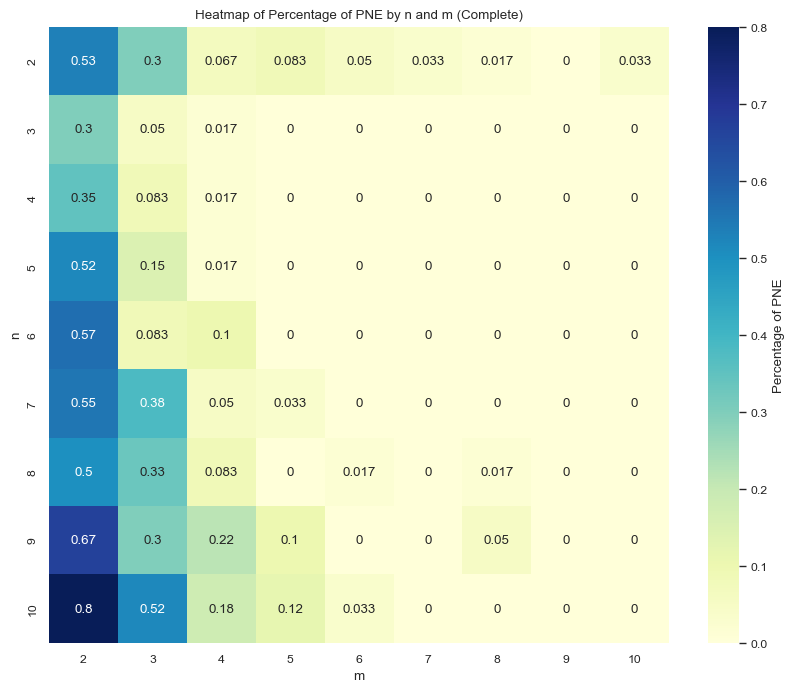

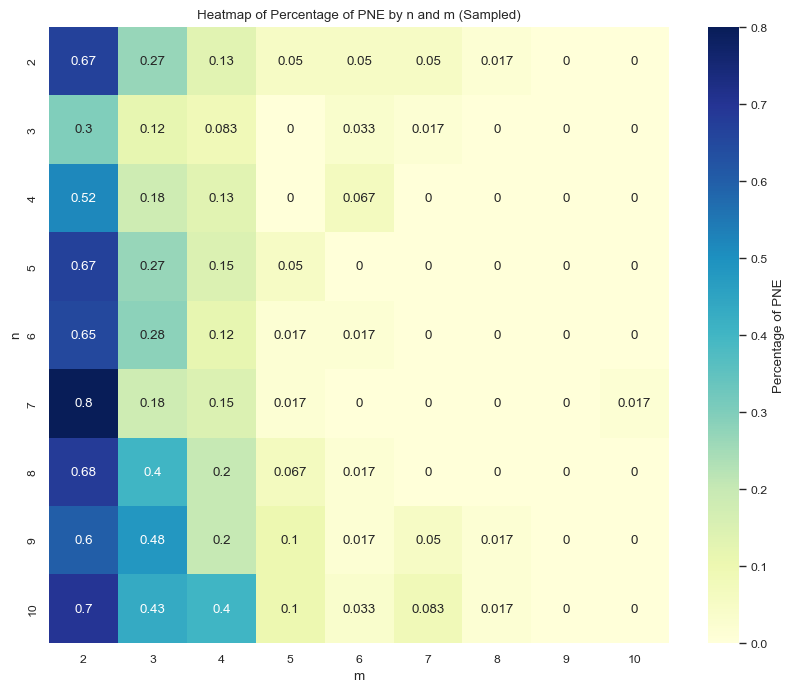

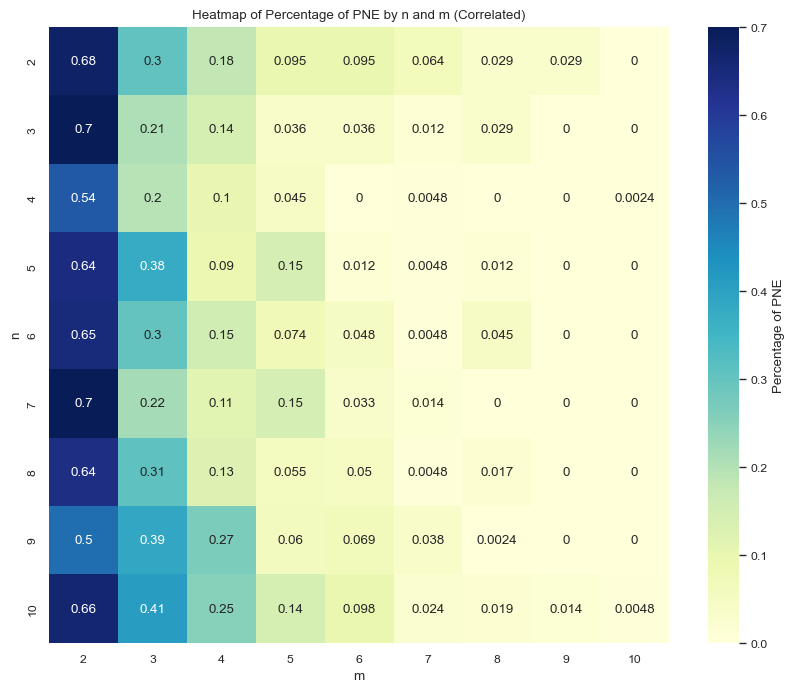

In [6]:
complete_pivot = complete.pivot_table(
    index='n', columns='m', values='result_type', aggfunc=lambda x: (x == 'PNE').mean()
)
sampled_pivot = sampled.pivot_table(
    index='n', columns='m', values='result_type', aggfunc=lambda x: (x == 'PNE').mean()
)
correlated_pivot = correlated.pivot_table(
    index='n', columns='m', values='result_type', aggfunc=lambda x: (x == 'PNE').mean()
)

# Generate the heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(complete_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage of PNE'})
plt.title('Heatmap of Percentage of PNE by n and m (Complete)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(sampled_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage of PNE'})
plt.title('Heatmap of Percentage of PNE by n and m (Sampled)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlated_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Percentage of PNE'})
plt.title('Heatmap of Percentage of PNE by n and m (Correlated)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

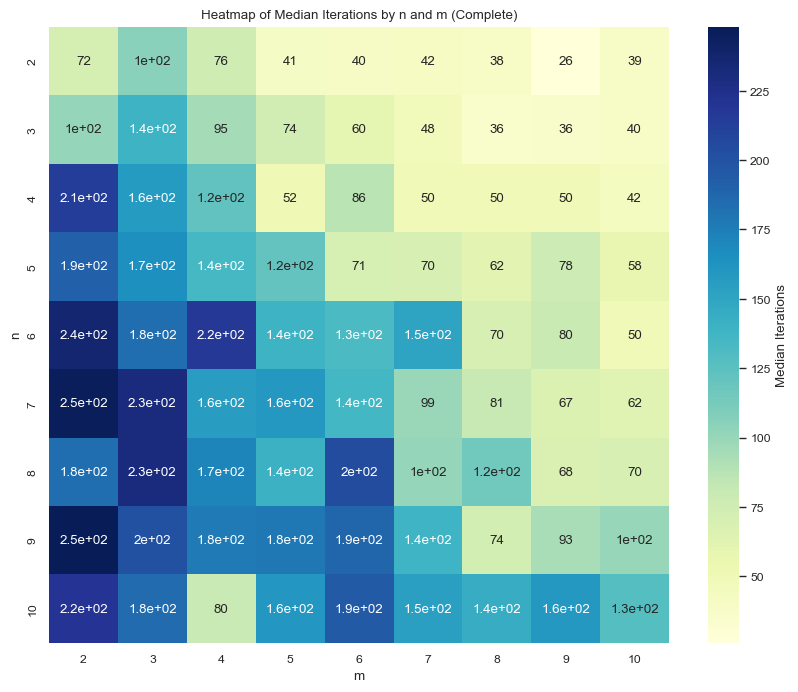

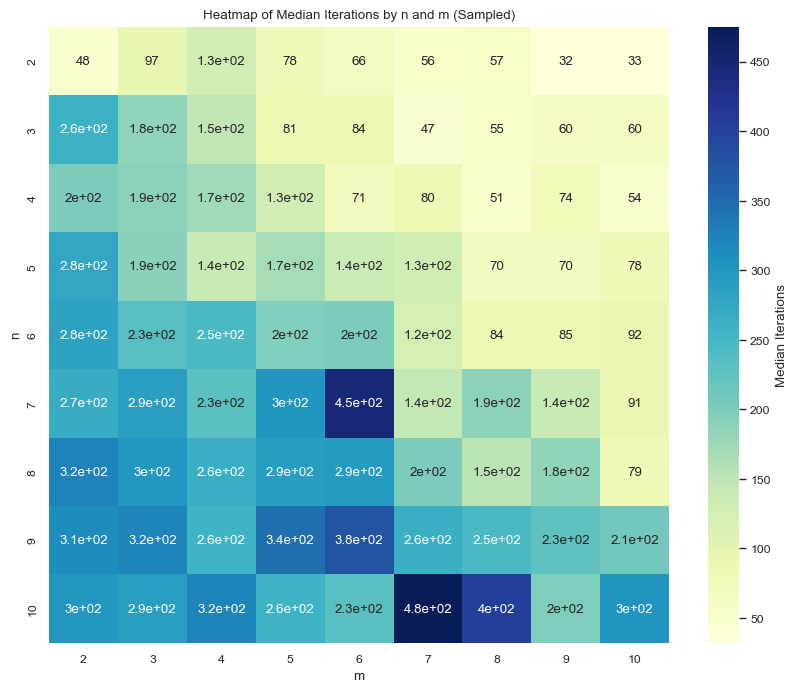

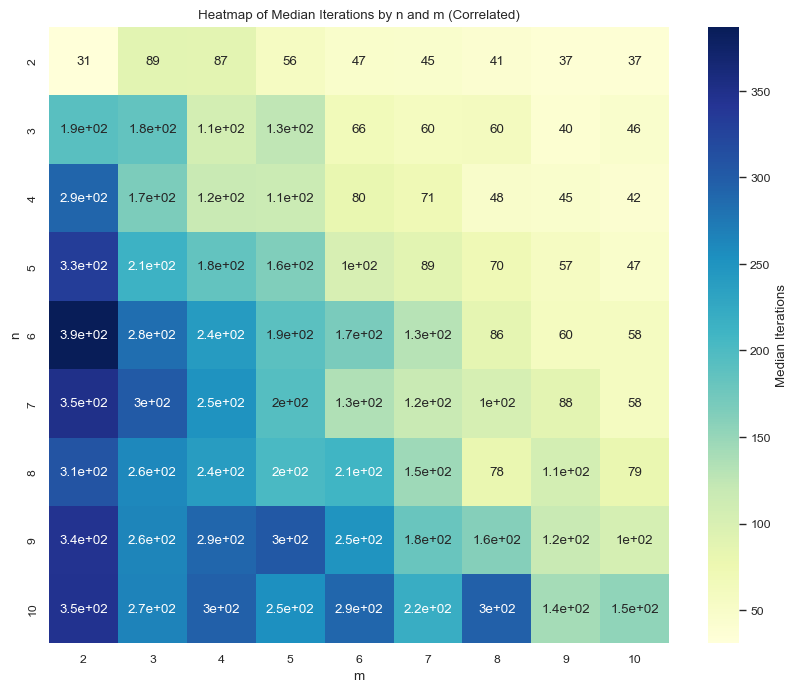

In [31]:
# Create pivot tables for the number of iterations
complete_iterations_pivot = complete.pivot_table(
    index='n', columns='m', values='iterations', aggfunc='median'
)
sampled_iterations_pivot = sampled.pivot_table(
    index='n', columns='m', values='iterations', aggfunc='median'
)
correlated_iterations_pivot = correlated.pivot_table(
    index='n', columns='m', values='iterations', aggfunc='median'
)

# Generate the heatmaps for iterations
plt.figure(figsize=(10, 8))
sns.heatmap(complete_iterations_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Median Iterations'})
plt.title('Heatmap of Median Iterations by n and m (Complete)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(sampled_iterations_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Median Iterations'})
plt.title('Heatmap of Median Iterations by n and m (Sampled)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlated_iterations_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Median Iterations'})
plt.title('Heatmap of Median Iterations by n and m (Correlated)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()


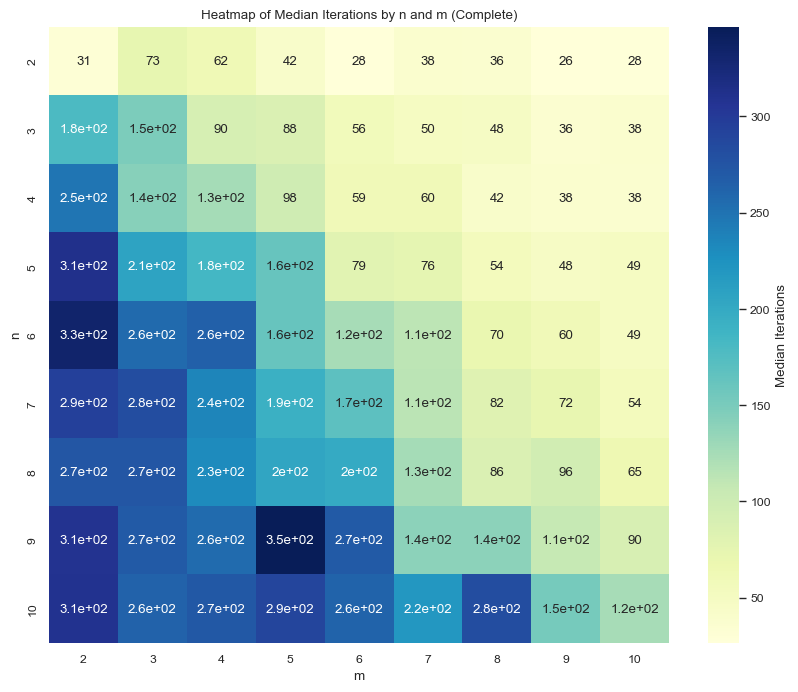

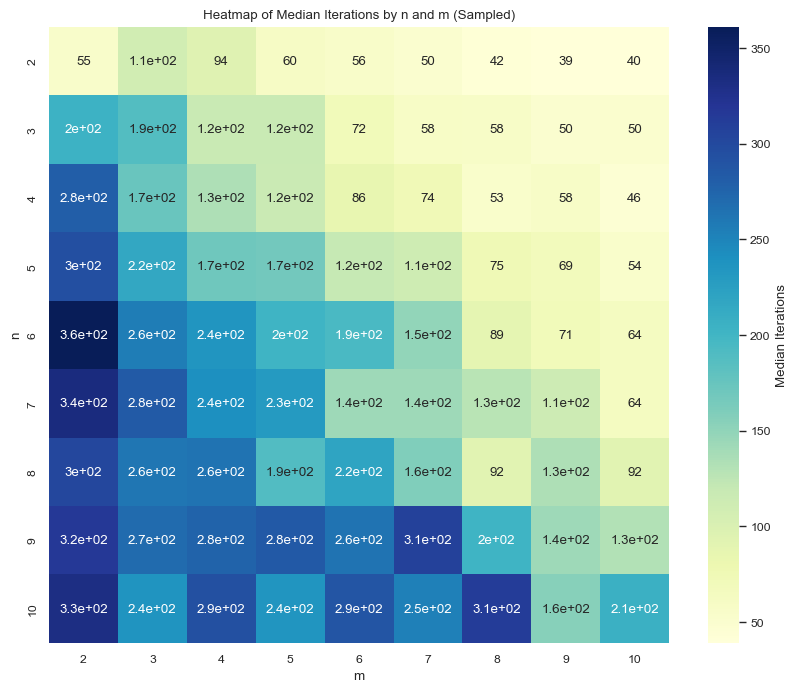

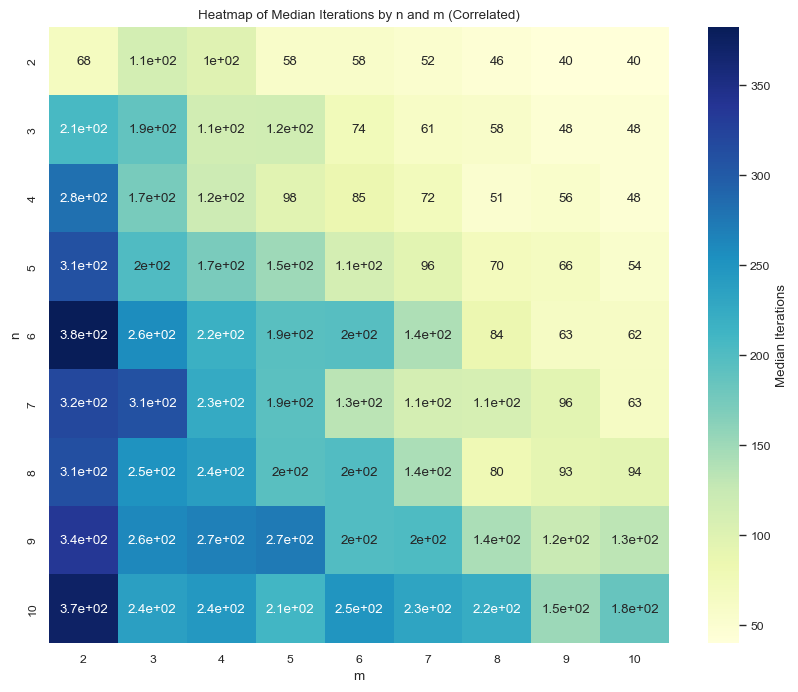

In [41]:
# Create pivot tables for the number of iterations
elim_all_iterations_pivot = elim_all.pivot_table(
    index='n', columns='m', values='iterations', aggfunc='median'
)
elim_subsequent_iterations_pivot = elim_subsequent.pivot_table(
    index='n', columns='m', values='iterations', aggfunc='median'
)
elim_current_iterations_pivot = elim_current.pivot_table(
    index='n', columns='m', values='iterations', aggfunc='median'
)

# Generate the heatmaps for iterations
plt.figure(figsize=(10, 8))
sns.heatmap(elim_all_iterations_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Median Iterations'})
plt.title('Heatmap of Median Iterations by n and m (Complete)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(elim_subsequent_iterations_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Median Iterations'})
plt.title('Heatmap of Median Iterations by n and m (Sampled)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(elim_current_iterations_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Median Iterations'})
plt.title('Heatmap of Median Iterations by n and m (Correlated)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()


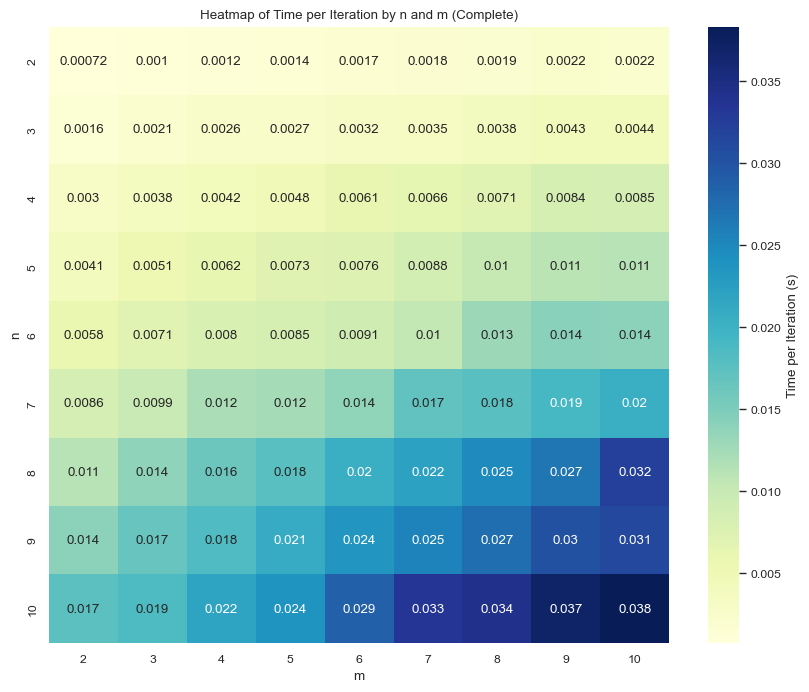

In [8]:
df_time_per_iteration_pivot = df.pivot_table(
    index='n', columns='m', values='time_per_iteration', aggfunc='median'
)

plt.figure(figsize=(10, 8))
sns.heatmap(df_time_per_iteration_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Time per Iteration (s)'})
plt.title('Heatmap of Time per Iteration by n and m (Complete)')
plt.xlabel('m')
plt.ylabel('n')
plt.show()

In [9]:
pnes = df[df['result_type'] == 'PNE']
cycles = df[df['result_type'] == 'Cycle']
print(f"PNEs: {pnes.shape[0]}, {round(pnes.shape[0] * 100 / df.shape[0], 2)}%")

# plt.figure()
# sns.histplot(pnes[pnes['iterations'] > 3]['iterations'], bins=100, kde=True) # type: ignore

# plt.figure()
# sns.histplot(cycles[cycles["iterations"] < 1000]['iterations'], bins=100, kde=True) # type: ignore



PNEs: 5947, 13.6%


In [10]:
pnes_complete = pnes[pnes['generator'] == 'complete']
cycles_complete = cycles[cycles['generator'] == 'complete']
print(f"PNEs (Complete): {pnes_complete.shape[0]}, {round(pnes_complete.shape[0] * 100 / complete.shape[0], 2)}%")

# plt.figure()
# sns.histplot(pnes_complete[pnes_complete['iterations'] > 3]['iterations'], bins=100, kde=True) # type: ignore

# plt.figure()
# sns.histplot(cycles_complete[cycles_complete["iterations"] < 1000]['iterations'], bins=100, kde=True) # type: ignore

PNEs (Complete): 499, 10.27%


In [11]:
pnes_sampled = pnes[pnes['generator'] == 'sampled']
cycles_sampled = cycles[cycles['generator'] == 'sampled']
print(f"PNEs (Sampled): {pnes_sampled.shape[0]}, {round(pnes_sampled.shape[0] * 100 / sampled.shape[0], 2)}%")

# plt.figure()
# sns.histplot(pnes_sampled[pnes_sampled['iterations'] > 3]['iterations'], bins=100, kde=True) # type: ignore

# plt.figure()
# sns.histplot(cycles_sampled[cycles_sampled["iterations"] < 1000]['iterations'], bins=100, kde=True) # type: ignore

PNEs (Sampled): 640, 13.17%


In [12]:
pnes_correlated = pnes[pnes['generator'] == 'correlated']
cycles_correlated = cycles[cycles['generator'] == 'correlated']
print(f"PNEs (Correlated): {pnes_correlated.shape[0]}, {round(pnes_correlated.shape[0] * 100 / correlated.shape[0], 2)}%")

# plt.figure()
# sns.histplot(pnes_correlated[pnes_correlated['iterations'] > 3]['iterations'], bins=100, kde=True) # type: ignore

# plt.figure()
# sns.histplot(cycles_correlated[cycles_correlated["iterations"] < 1000]['iterations'], bins=100, kde=True) # type: ignore

PNEs (Correlated): 4808, 14.13%


Text(0, 0.5, 'Percentage of PNEs')

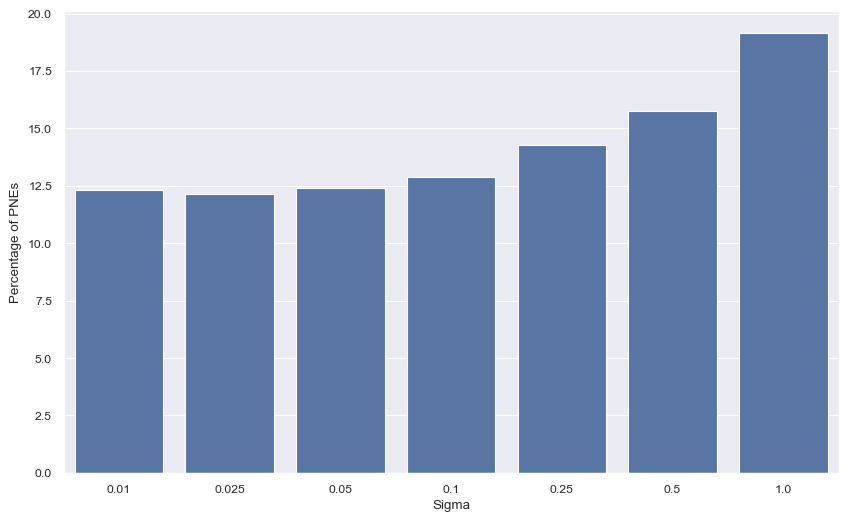

In [18]:
# Calculate percentage of PNEs for each sigma value

sigma_pne_percentages = []
for sigma, df_sigma in correlated.groupby("sigma"):
    pnes_sigma = df_sigma[df_sigma['result_type'] == 'PNE']
    pne_percentage = (pnes_sigma.shape[0] / df_sigma.shape[0]) * 100
    sigma_pne_percentages.append({'sigma': sigma, 'pne_percentage': pne_percentage})

# Convert to DataFrame and sort by sigma
df_percentages = pd.DataFrame(sigma_pne_percentages).sort_values('sigma')

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_percentages, x='sigma', y='pne_percentage')
plt.xlabel('Sigma')
plt.ylabel('Percentage of PNEs')


In [29]:
len(df[df['sigma'].isna()]) / len(df)


0.2222222222222222

In [19]:
display(pnes.describe())
display(cycles.describe())

,runtime,iterations,cycle_length,max_social_welfare,max_liquid_welfare,max_revenue,min_social_welfare,min_liquid_welfare,min_revenue,n,m,sigma,time_per_iteration
count,5947.000000,5947.000000,5947.0,5947.000000,5947.000000,5947.000000,5947.000000,5947.000000,5947.000000,5947.000000,5947.000000,4808.000000,5947.000000
mean,2.140466,232.763242,0.0,1.860585,1.432509,1.432509,1.235423,0.797999,0.797999,6.239448,2.992265,0.332946,0.008976
std,4.116655,434.304005,0.0,1.005338,0.957024,0.957024,0.883512,0.893158,0.893158,2.692599,1.374999,0.365177,0.007577
min,0.000311,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.010000,0.000237
25%,0.095602,31.000000,0.0,1.163763,0.778080,0.778080,0.640046,0.202777,0.202777,4.000000,2.000000,0.050000,0.002579
50%,1.095868,191.000000,0.0,1.670674,1.230099,1.230099,1.031137,0.493652,0.493652,6.000000,2.000000,0.100000,0.006972
75%,3.131953,352.000000,0.0,2.300265,1.809870,1.809870,1.591412,1.044204,1.044204,9.000000,4.000000,0.500000,0.013880
max,179.066050,22453.000000,0.0,8.177583,7.758953,7.758953,6.501475,6.501475,6.501475,10.000000,10.000000,1.000000,0.048638


,runtime,iterations,cycle_length,max_social_welfare,max_liquid_welfare,max_revenue,min_social_welfare,min_liquid_welfare,min_revenue,n,m,sigma,time_per_iteration
count,37793.000000,37793.000000,37793.000000,37793.000000,37793.000000,37793.000000,37793.000000,37793.000000,37793.000000,37793.000000,37793.000000,29212.000000,37793.000000
mean,10.721997,629.279972,282.759188,4.173410,3.631359,3.631359,3.148435,1.988337,1.988337,5.962321,6.473289,0.267126,0.013388
std,105.541069,5659.600671,4046.092278,1.931490,1.937412,1.937412,1.649619,1.599555,1.599555,2.562184,2.402267,0.330180,0.010558
min,0.002233,3.000000,2.000000,0.114100,0.061089,0.061089,0.023203,0.003810,0.003810,2.000000,2.000000,0.010000,0.000558
25%,0.328393,49.000000,25.000000,2.659628,2.074415,2.074415,1.862041,0.762796,0.762796,4.000000,5.000000,0.025000,0.004617
50%,1.075976,117.000000,60.000000,3.998897,3.381838,3.381838,2.967277,1.533072,1.533072,6.000000,7.000000,0.100000,0.010393
75%,3.659896,281.000000,132.000000,5.512909,4.935419,4.935419,4.224574,2.820139,2.820139,8.000000,9.000000,0.500000,0.020156
max,11031.381740,551333.000000,476233.000000,10.000000,10.000000,10.000000,9.631958,8.766812,8.766812,10.000000,10.000000,1.000000,0.066252
